In [64]:
import pandas as pd
import numpy as np
import math
#import io
#import requests

data_folder = "data"

a1 = pd.read_csv('data/unbalance.txt', names=['x', 'y'], delim_whitespace=True, dtype=np.float64)
#a2 = pd.read_csv('data/a2.txt', names=['x', 'y'], delim_whitespace=True, dtype=np.float64)
#a3 = pd.read_csv('data/a3.txt', names=['x', 'y'], delim_whitespace=True, dtype=np.float64)

In [129]:
a1 = (a1 - a1.mean()) / (a1.max() - a1.min())
#a1 = (a1 - a1.mean()) / (a1.std())

#a2_n = (a2 - a2.mean()) / (a2.max() - a2.min())
#a2_s = (a2 - a2.mean()) / (a2.std())

#a3_n = (a3 - a3.mean()) / (a3.max() - a3.min())
#a3_s = (a3 - a3.mean()) / (a3.std())

In [130]:
from sklearn.cluster import KMeans

In [131]:
def alpha_k(k, dim):
    if k == 2:
        return 1.0 - 3.0 / (4.0 * dim)
    else:
        ak1 = alpha_k(k - 1, dim)
        return ak1 + (1.0 - ak1) / 6.0

In [132]:
def cluster_eval(s_k, a_k, k):
    if k == 1:
        return 1.0
    elif s_k[k-2] != 0.0:
        print('k: {0}, a: {1}, s(k-1): {2}, s(k): {3}, f(k): {4}'.format(k, a_k[k-1], s_k[k-2], s_k[k-1], s_k[k-1] / (a_k[k-1] * s_k[k-2])))
        return s_k[k-1] / (a_k[k-1] * s_k[k-2])
    else:
        return 1.0

In [133]:
def calculate_alpha_k(df, max_k):
    a_k = np.zeros(max_k)
    dims = len(df.columns)
    
    for k in range(2, max_k + 1):
        if k == 2:
            a_k[k-1] = 1.0 - 3.0 / (4.0 * dims)
        else:
            a_k[k-1] = a_k[k-2] + (1.0 - a_k[k-2]) / 6.0
    return a_k

In [134]:
def calculate_s_k(df,max_k):
    kmeans_list = [KMeans(n_clusters=k).fit(df) for k in range(1, max_k + 1)]
    s_k = np.array([kmeans.inertia_ for kmeans in kmeans_list])
    return s_k

In [135]:
def calculate_f_k(df, max_k):
    f_k = np.ones(max_k)
    a_k = calculate_alpha_k(df, max_k)
    s_k = calculate_s_k(df, max_k)
        
    for k in range(2, max_k + 1):
        f_k[k-1] = cluster_eval(s_k, a_k, k)
    return f_k

In [136]:
def estimate_k(df, max_k):
    f_k = calculate_f_k(df, max_k)
    return np.argmin(f_k) + 1

In [137]:
def distance_to_line(px0, py0, x0, y0, x1, y1):
    dy = y0 - y1
    dx = x0 - x1
    return abs(dy * px0 - dx * py0 + (x0 * y1 - x1 * y0)) / math.sqrt(dx * dx + dy * dy)

In [138]:
def estimate_elbow(df, max_k):
    s_k = calculate_s_k(df, max_k)
    x0 = 1
    y0 = s_k[0]
    x1 = len(df)
    y1 = 0
    max_dist = 0
    
    for x in range(1, len(df)):
        dist = distance_to_line(x, s_k[x-1], x0, y0, x1, y1)
        if dist > max_dist:
            max_dist = dist
        else:
            return x
    return -1

In [139]:
estimate_elbow(a1, 20)

1

In [140]:
s_k = calculate_s_k(a1, 20)
s_k

array([341.05440511, 105.96380478,  64.22290965,  33.18595577,
        14.28662635,   9.37069312,   6.80754397,   4.24711184,
         3.80183251,   3.3717359 ,   2.95912008,   2.70053913,
         2.53699049,   2.27845526,   2.08564873,   1.90295605,
         1.85337   ,   1.67197689,   1.60029463,   1.47964901])

In [141]:
calculate_alpha_k(a1, 20)

array([0.        , 0.625     , 0.6875    , 0.73958333, 0.78298611,
       0.81915509, 0.84929591, 0.87441326, 0.89534438, 0.91278699,
       0.92732249, 0.93943541, 0.94952951, 0.95794125, 0.96495105,
       0.97079254, 0.97566045, 0.97971704, 0.98309753, 0.98591461])

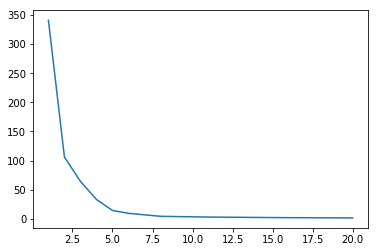

In [142]:
%matplotlib inline
import matplotlib.pyplot as plt 

fig, ax1 = plt.subplots()
ax1.plot(range(1, len(s_k) + 1), s_k)


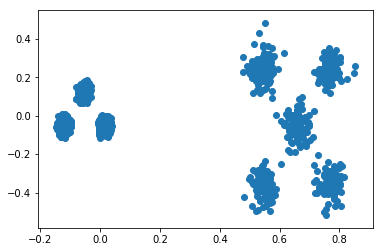

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.scatter(a1.x, a1.y)

In [144]:
t = np.arange(1, 31)
f_k = calculate_f_k(a1, 30)
#fig, ax1 = plt.subplots()
#ax1.plot(t, f_k)
f_k

k: 2, a: 0.625, s(k-1): 341.05440510525784, s(k): 105.96380477510974, f(k): 0.4971115608017163
k: 3, a: 0.6875, s(k-1): 105.96380477510974, s(k): 64.222909647321, f(k): 0.8815759447620066
k: 4, a: 0.7395833333333334, s(k-1): 64.222909647321, s(k): 33.185955770350056, f(k): 0.6986782708934309
k: 5, a: 0.7829861111111112, s(k-1): 33.185955770350056, s(k): 14.286626345978311, f(k): 0.5498209676265934
k: 6, a: 0.8191550925925927, s(k-1): 14.286626345978311, s(k): 9.370693116736001, f(k): 0.8007111818698777
k: 7, a: 0.8492959104938272, s(k-1): 9.370693116736001, s(k): 6.807543966380376, f(k): 0.855381211511209
k: 8, a: 0.8744132587448561, s(k-1): 6.807543966380376, s(k): 4.247111838858266, f(k): 0.7134877290354816
k: 9, a: 0.8953443822873801, s(k-1): 4.247111838858266, s(k): 3.8015731341263113, f(k): 0.999722667634676
k: 10, a: 0.9127869852394834, s(k-1): 3.8015731341263113, s(k): 3.371429169495983, f(k): 0.9715860062361793
k: 11, a: 0.9273224876995695, s(k-1): 3.371429169495983, s(k): 3.13

array([1.        , 0.49711156, 0.88157594, 0.69867827, 0.54982097,
       0.80071118, 0.85538121, 0.71348773, 0.99972267, 0.97158601,
       1.00412574, 0.91549165, 0.96454072, 0.9615938 , 0.9484782 ,
       0.94149507, 0.96370999, 0.95237282, 1.0120913 , 0.91121022,
       0.97079977, 0.96680466, 0.97631802, 0.96062399, 0.96590939,
       0.95726137, 0.98511201, 0.96154647, 0.9783511 , 0.97678448])

In [145]:
calculate_alpha_k(a1, 30)

array([0.        , 0.625     , 0.6875    , 0.73958333, 0.78298611,
       0.81915509, 0.84929591, 0.87441326, 0.89534438, 0.91278699,
       0.92732249, 0.93943541, 0.94952951, 0.95794125, 0.96495105,
       0.97079254, 0.97566045, 0.97971704, 0.98309753, 0.98591461,
       0.98826218, 0.99021848, 0.99184873, 0.99320728, 0.9943394 ,
       0.99528283, 0.99606903, 0.99672419, 0.99727016, 0.99772513])

In [146]:
f_k

array([1.        , 0.49711156, 0.88157594, 0.69867827, 0.54982097,
       0.80071118, 0.85538121, 0.71348773, 0.99972267, 0.97158601,
       1.00412574, 0.91549165, 0.96454072, 0.9615938 , 0.9484782 ,
       0.94149507, 0.96370999, 0.95237282, 1.0120913 , 0.91121022,
       0.97079977, 0.96680466, 0.97631802, 0.96062399, 0.96590939,
       0.95726137, 0.98511201, 0.96154647, 0.9783511 , 0.97678448])